## Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,8)  ##Setting the figure size 
import seaborn as sns

from scipy.stats import norm
from datetime import date, datetime , timedelta

import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
retail = pd.read_excel(r'C:\Users\DELL\OneDrive\Documents\Online Retail.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = retail.copy()
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Creating a new column 'Amount'

In [9]:
df['Amount']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Extracting year and month from 'InvoiceDate_year' column

In [10]:
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month']= df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [11]:
print(df['CustomerID'].nunique())
print(df['StockCode'].nunique())
print(df['Description'].nunique())

4372
4070
4223


#### Dropping columns with quantity and price values in negative

In [12]:
mask = (df['Quantity'] >= 0) & (df['UnitPrice'] > 0)
df = df[mask]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12


In [13]:
df.shape

(530104, 11)

#### Filter the DataFrame df to exclude rows where the "CustomerID" is null (missing)

In [14]:
df=df[(df['CustomerID'].isnull()==False)]
df.shape

(397884, 11)

## RFM Model for Customer Value:
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

**Recency:** The value of how recently a customer purchased at the establishment (Days since last purchase)

**Frequency:** How frequent the customer’s transactions are at the establishment (Total number of purchases)

**Monetary value:** How much money did the customer spend in a particular period. 

## RECENCY
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [15]:
reference_date = df.InvoiceDate.max() + timedelta(days = 1)
print('Reference Date:', reference_date)
df['days_since_last_purchase'] = (reference_date - df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df

Reference Date: 2011-12-10 12:50:00


,CustomerID,recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0
...,...,...
4333,18280.0,278.0
4334,18281.0,181.0
4335,18282.0,8.0
4336,18283.0,4.0


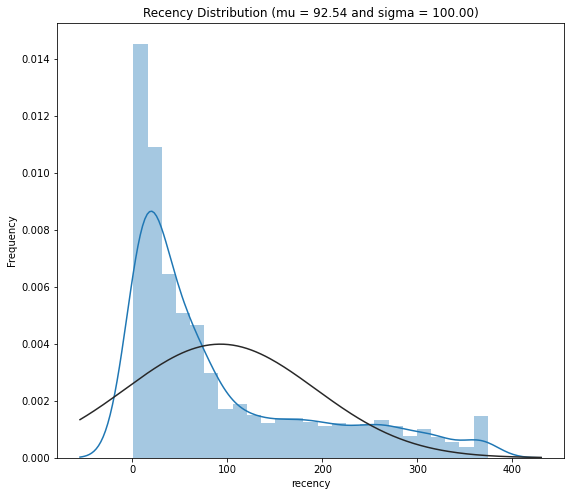

In [16]:
# Get the fitted parameters (mu and sigma) for the normal distribution
(mu, sigma) = norm.fit(customer_history_df['recency'])

# Create a figure and subplot for the distribution plot
fig1 = plt.figure().add_subplot(121)

# Plot the kernel density plot with the fitted normal distribution
sns.distplot(customer_history_df['recency'], fit=norm)

# Set the title, x-axis label, and y-axis label
fig1.set_title('Recency Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
fig1.set_xlabel('recency')
fig1.set_ylabel('Frequency')

# Display the plot
plt.show()


## FREQUENCY
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [17]:
customer_freq = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
customer_freq.rename(columns={'InvoiceNo': 'frequency'}, inplace=True)

customer_freq

,CustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [18]:
customer_history_df = customer_history_df.merge(customer_freq)
customer_history_df

,CustomerID,recency,frequency
0,12346.0,326.0,1
1,12347.0,2.0,7
2,12348.0,75.0,4
3,12349.0,19.0,1
4,12350.0,310.0,1
...,...,...,...
4333,18280.0,278.0,1
4334,18281.0,181.0,1
4335,18282.0,8.0,2
4336,18283.0,4.0,16


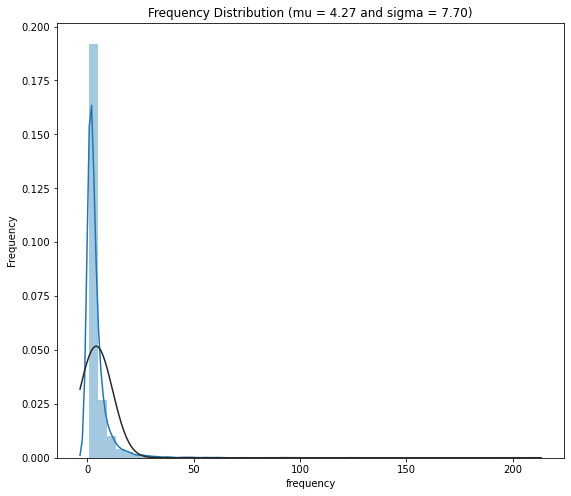

In [19]:
# Get the fitted parameters (mu and sigma) for the normal distribution
(mu, sigma) = norm.fit(customer_history_df['frequency'])

# Create a figure and subplot for the distribution plot
fig1 = plt.figure().add_subplot(121)

# Plot the kernel density plot with the fitted normal distribution
sns.distplot(customer_history_df['frequency'], fit=norm)

# Set the title, x-axis label, and y-axis label
fig1.set_title('Frequency Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
fig1.set_xlabel('frequency')
fig1.set_ylabel('Frequency')

# Display the plot
plt.show()

## MONETARY
Monetary attribute answers the question: How much money did the customer spent over time?

In [20]:
customer_history_df = customer_history_df.merge(df[['CustomerID','Amount']].groupby("CustomerID").sum().reset_index())
customer_history_df.rename(columns={'Amount':'monetary'},inplace=True)
customer_history_df

,CustomerID,recency,frequency,monetary
0,12346.0,326.0,1,77183.60
1,12347.0,2.0,7,4310.00
2,12348.0,75.0,4,1797.24
3,12349.0,19.0,1,1757.55
4,12350.0,310.0,1,334.40
...,...,...,...,...
4333,18280.0,278.0,1,180.60
4334,18281.0,181.0,1,80.82
4335,18282.0,8.0,2,178.05
4336,18283.0,4.0,16,2094.88


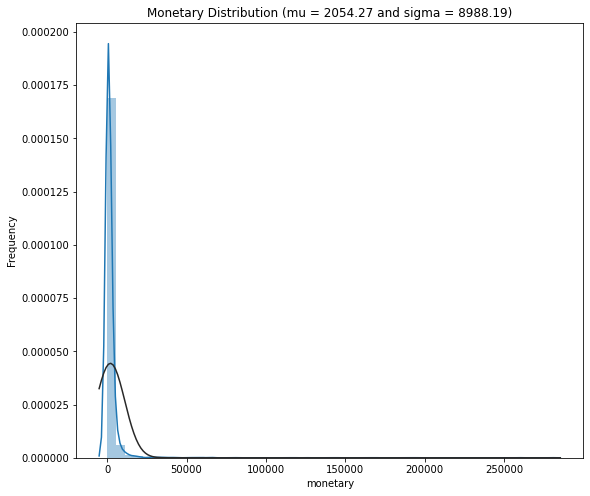

In [21]:
# Get the fitted parameters (mu and sigma) for the normal distribution
(mu, sigma) = norm.fit(customer_history_df['monetary'])
# Create a figure and subplot for the distribution plot
fig1 = plt.figure().add_subplot(121)
# Plot the kernel density plot with the fitted normal distribution
sns.distplot(customer_history_df['monetary'],fit=norm)
# Set the title, x-axis label, and y-axis label
fig1.set_title('Monetary Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
fig1.set_xlabel('monetary')
fig1.set_ylabel('Frequency')
# Display the plot
plt.show()

In [22]:
customer_history_df.describe()

,CustomerID,recency,frequency,monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


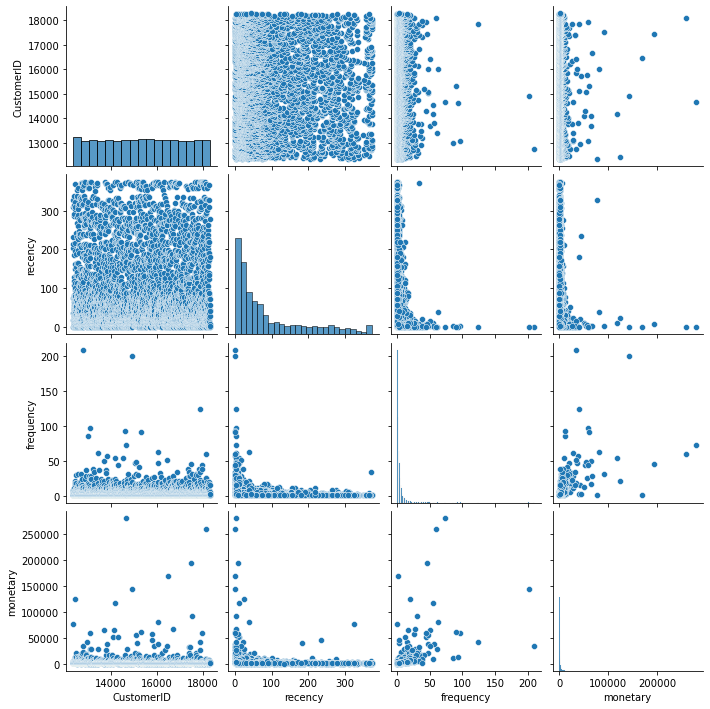

In [23]:
# Create a pair plot of the DataFrame
sns.pairplot(customer_history_df)
# Display the plot
plt.show()

## RFM Table Correctness Verification

In [24]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month,days_since_last_purchase
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011,1,326.0


***As we can see our RFM table is correct. The first customer bought only once, and only one product with huge amount***

## Applying RFM score formula

The simplest way to create customer segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [25]:
#We create two scores for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
quantiles = customer_history_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
customer_history_df['R'] = customer_history_df['recency'].apply(RScore, args=('recency',quantiles,))
customer_history_df['F'] = customer_history_df['frequency'].apply(FMScore, args=('frequency',quantiles,))
customer_history_df['M'] = customer_history_df['monetary'].apply(FMScore, args=('monetary',quantiles,))

## Calculate RFM_Score

In [26]:
customer_history_df['RFM_Score'] = customer_history_df.R.map(str) \
                            + customer_history_df.F.map(str) \
                            + customer_history_df.M.map(str)
customer_history_df
     

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score
0,12346.0,326.0,1,77183.60,1,1,4,114
1,12347.0,2.0,7,4310.00,4,4,4,444
2,12348.0,75.0,4,1797.24,2,3,4,234
3,12349.0,19.0,1,1757.55,3,1,4,314
4,12350.0,310.0,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,278.0,1,180.60,1,1,1,111
4334,18281.0,181.0,1,80.82,1,1,1,111
4335,18282.0,8.0,2,178.05,4,2,1,421
4336,18283.0,4.0,16,2094.88,4,4,4,444


In [27]:
customer_history_df[customer_history_df['RFM_Score']=='444'].sort_values('monetary', ascending=False).head(10)

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score
1689,14646.0,2.0,73,280206.02,4,4,4,444
4201,18102.0,1.0,60,259657.30,4,4,4,444
3728,17450.0,8.0,46,194550.79,4,4,4,444
1879,14911.0,1.0,201,143825.06,4,4,4,444
1333,14156.0,10.0,55,117379.63,4,4,4,444
3771,17511.0,3.0,31,91062.38,4,4,4,444
3176,16684.0,4.0,28,66653.56,4,4,4,444
1289,14096.0,4.0,17,65164.79,4,4,4,444
996,13694.0,4.0,50,65039.62,4,4,4,444
2176,15311.0,1.0,91,60767.90,4,4,4,444


In [28]:
customer_history_df['RFM_Score'] = customer_history_df['RFM_Score'].astype(int)

In [29]:
def cust_seg(RFM_Score):
    if RFM_Score >= 444:
        return 'Platinum Customer'
    elif RFM_Score >= 433 and RFM_Score < 444:
        return 'Very Loyal'
    elif RFM_Score >= 421 and RFM_Score < 433:
        return 'Becoming Loyal'
    elif RFM_Score >= 344 and RFM_Score < 421:
        return 'Recent Customer'
    elif RFM_Score >= 323 and RFM_Score < 344:
        return 'Potential Customer'
    elif RFM_Score >= 311 and RFM_Score < 323:
        return 'Late Bloomer'
    elif RFM_Score >= 224 and RFM_Score < 311:
        return 'Losing Customer'
    elif RFM_Score >= 212 and RFM_Score < 224:
        return 'High-Risk Customer'
    elif RFM_Score >= 124 and RFM_Score < 212:
        return 'Almost Lost Customer'
    elif RFM_Score >= 112 and RFM_Score < 124:
        return 'Evasive Customer'
    else:
        return 'Lost Customer'

In [30]:
customer_history_df['Segment'] = customer_history_df['RFM_Score'].apply(cust_seg)

In [31]:
customer_history_df.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,12346.0,326.0,1,77183.60,1,1,4,114,Evasive Customer
1,12347.0,2.0,7,4310.00,4,4,4,444,Platinum Customer
2,12348.0,75.0,4,1797.24,2,3,4,234,Losing Customer
3,12349.0,19.0,1,1757.55,3,1,4,314,Late Bloomer
4,12350.0,310.0,1,334.40,1,1,2,112,Evasive Customer


## How many customers do we have in each segment?

In [32]:
# Count the number of customers in each segment
segment_counts = customer_history_df['Segment'].value_counts()
segment_counts

Evasive Customer        492
Potential Customer      480
Platinum Customer       462
Lost Customer           443
Losing Customer         434
High-Risk Customer      425
Late Bloomer            401
Almost Lost Customer    356
Very Loyal              334
Recent Customer         285
Becoming Loyal          226
Name: Segment, dtype: int64

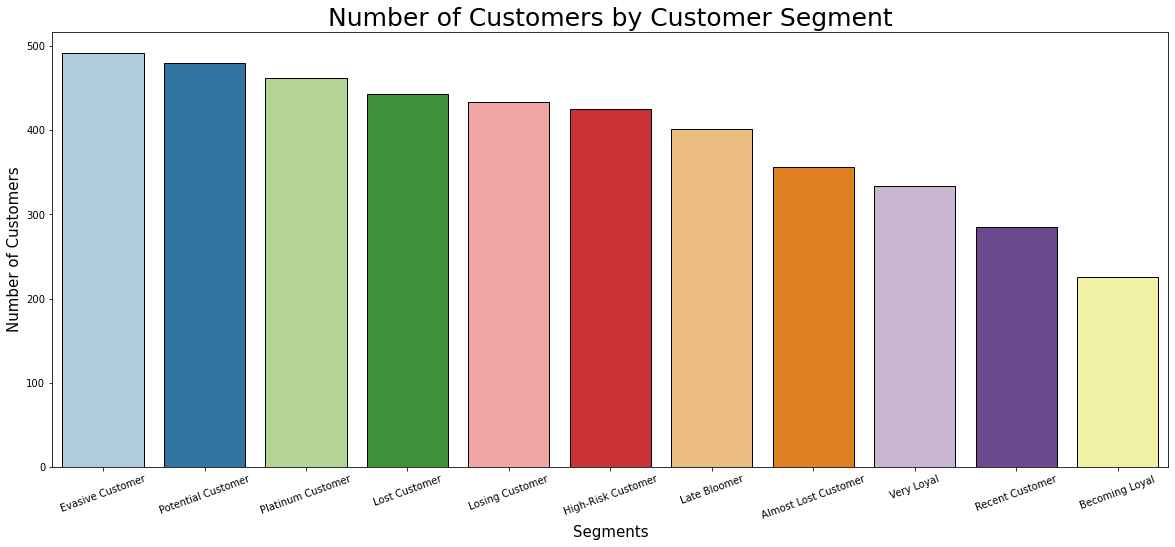

In [33]:
# Create the bar plot
sns.barplot(segment_counts.index,segment_counts.values, palette="Paired", edgecolor = 'k')
plt.xlabel('Segments', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.title('Number of Customers by Customer Segment' , fontsize=25 )
plt.xticks(rotation =20)
plt.show()

***Now that we knew our customers segments we can choose how to target or deal with each segment***

***For example:***

***Best Customers - Platinum Customer: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".***

***At Risk: Send them personalized emails to encourage them to shop.***

In [34]:
customer_history_df.to_csv('Customer_RFM_Analysis.csv', index=False)

In [35]:
categorical_cols = ['Country','InvoiceDate_year','InvoiceDate_month']
year_col= ['InvoiceDate_year','InvoiceDate_month','Amount']
year_analysis= df[year_col]

In [36]:
#for seasonal and yearly(peak sale months) analysis
year_analysis.groupby(['InvoiceDate_year','InvoiceDate_month']).sum('Amount')

Amount
InvoiceDate_year InvoiceDate_month             
2010             12                  572713.890
2011             1                   569445.040
                 2                   447137.350
                 3                   595500.760
                 4                   469200.361
                 5                   678594.560
                 6                   661213.690
                 7                   600091.011
                 8                   645343.900
                 9                   952838.382
                 10                 1039318.790
                 11                 1161817.380
                 12                  518192.790

In [37]:
year_analysis.to_csv('yearly_analysis.csv')

#### COUNTRY WISE SALES REVENUE ANALYSIS

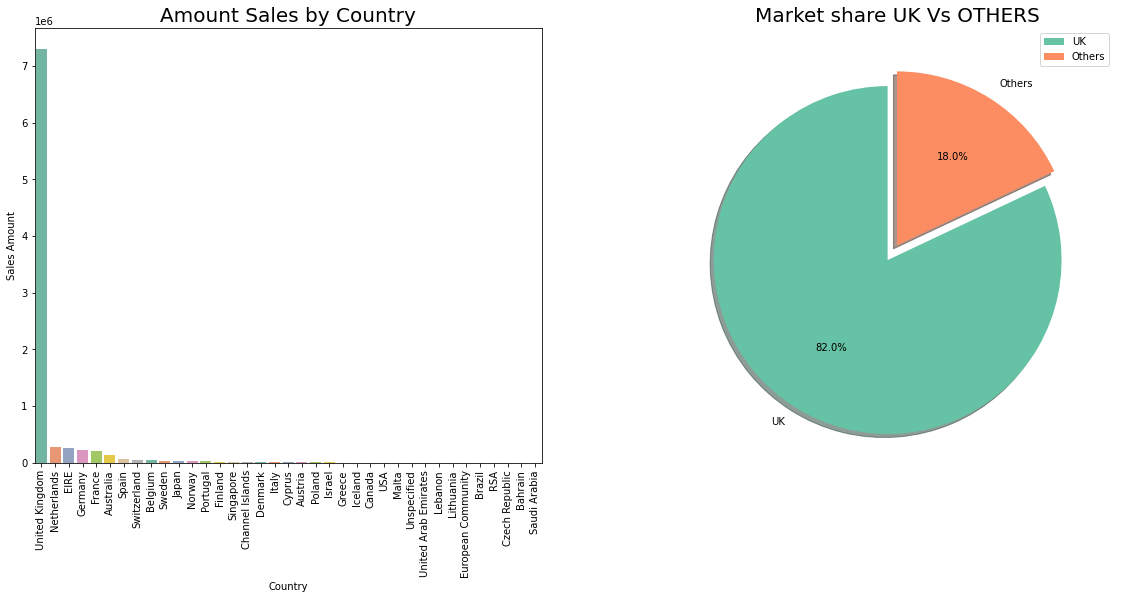

In [38]:
# Create the first subplot for the bar plot
plt.subplot(121)

# Group the data by country and calculate the sum of sales amount
sales_by_country = df.groupby("Country")['Amount'].sum().sort_values(ascending=False)

# Create the bar chart using Seaborn
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='Set2')
plt.title('Amount Sales by Country', fontsize=20)
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability

# Create the second subplot for the pie chart
plt.subplot(122)

# Create a new column to categorize UK and others for market share
df['Max_to_total_marketshare'] = df.Country.apply(lambda x: 'UK' if x == 'United Kingdom' else 'Others')

# Group the data by market share category and calculate the sum of sales amount
market_share = df.groupby("Max_to_total_marketshare").Amount.sum().sort_values(ascending=False)

# Plot the pie chart using Seaborn
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', shadow=True, startangle=90, 
        colors=sns.color_palette('Set2'), explode=[0.1, 0])
plt.title('Market share UK Vs OTHERS', fontsize=20)
plt.legend()
plt.show()

In [39]:
plt.savefig("Market.png")

<Figure size 1440x576 with 0 Axes>

## TOP SOLD(POPULAR) PRODUCTS: 
Any order placed for any product is confirmed by the Unique Invoice for every new order

In [40]:
product=df[["Description", "InvoiceNo"]].groupby(["Description"])["InvoiceNo"].nunique().sort_values(ascending=False)
product.head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    1971
REGENCY CAKESTAND 3 TIER              1703
JUMBO BAG RED RETROSPOT               1600
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1375
Name: InvoiceNo, dtype: int64

In [41]:
AmountSum = df.groupby(["Description"]).Amount.sum().sort_values(ascending = False)

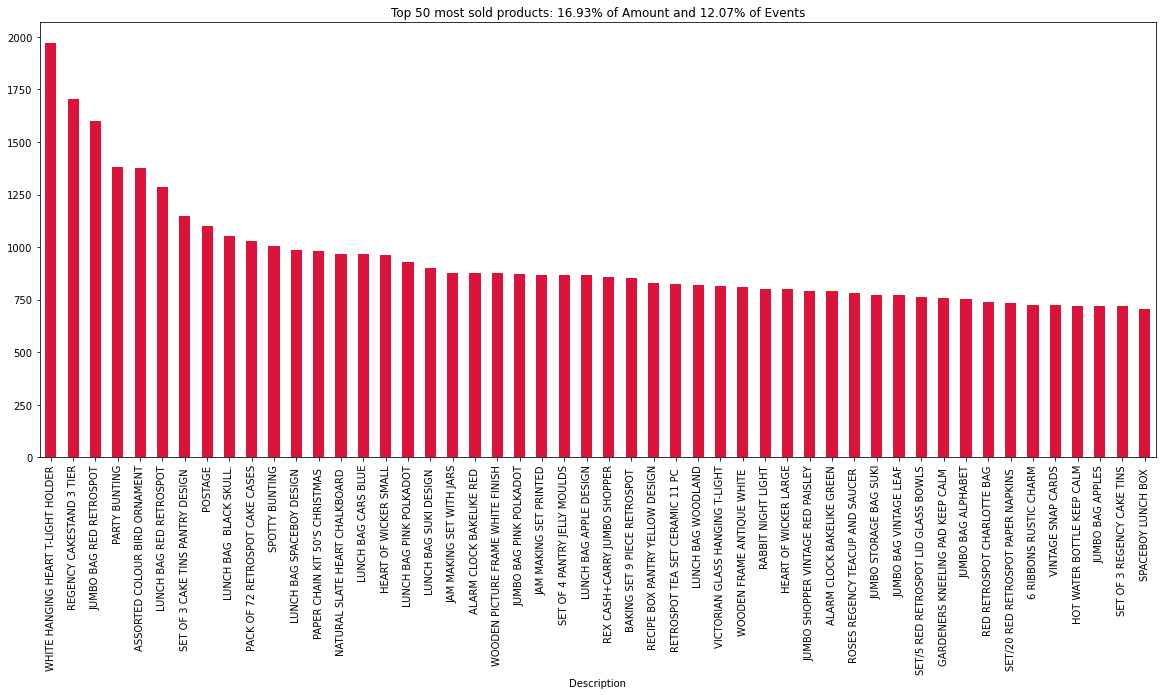

In [42]:
# Select the top 50 products
Top50products = list(product[:50].index)
# Calculate the percentage of revenue and events for the top 50 products
Percent_By_revenue = np.round((AmountSum[Top50products].sum() / AmountSum.sum()) * 100, 2)
Percent_by_event = np.round((product[Top50products].sum() / product.sum()) * 100, 2)

# Plot the bar chart
g = product[Top50products].plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'
                                .format(Percent_By_revenue, Percent_by_event), color = 'crimson')

plt.xticks(rotation = 90)
plt.show()

In [43]:
plt.savefig("Product_Event.png")

<Figure size 1440x576 with 0 Axes>

## TOP REVENUE GENERATING PRODUCTS: 
A function of unitprice and the quantity of each order.

In [44]:
AmountSum.head()

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: Amount, dtype: float64

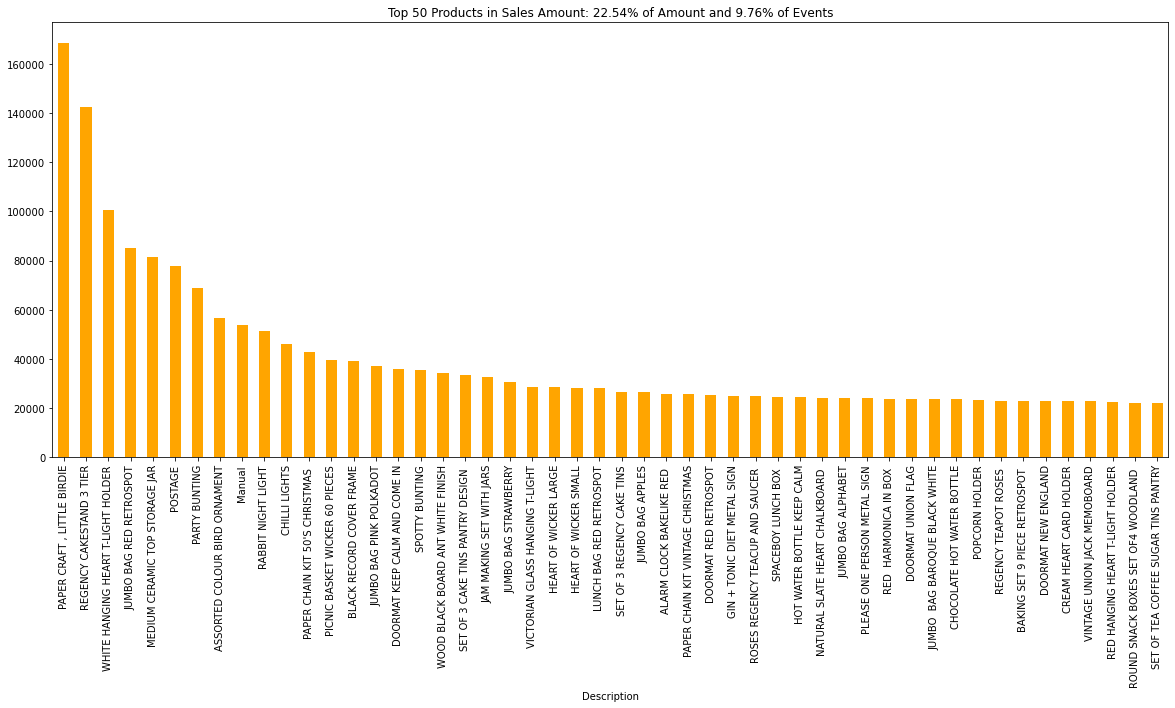

In [45]:
# Select the top 50 products based on sales amount
Top50products = list(AmountSum[:50].index)

# Calculate the percentage of revenue and events for the top 50 products
Percent_by_revenue = np.round((AmountSum[Top50products].sum() / AmountSum.sum()) * 100, 2)
Percent_by_events = np.round((product[Top50products].sum() / product.sum()) * 100, 2)

# Plot the bar chart
g = AmountSum[Top50products].plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'
         .format(Percent_by_revenue, Percent_by_events), color = 'orange')

plt.show()

In [46]:
plt.savefig("Product_revenue.png")

<Figure size 1440x576 with 0 Axes>